In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
import os

im_height = 224
im_width = 224
batch_size =16
class_num=2
image_path = "Dataset/test/"
saveModelName='genderclassification1.h5'
names=os.listdir(image_path)
validation_dir = image_path
validation_image_generator = ImageDataGenerator(rescale=1. / 255)
val_data_gen = validation_image_generator.flow_from_directory(directory=validation_dir, batch_size=batch_size,shuffle=False,  target_size=(im_height, im_width),  class_mode='binary')
total_val = val_data_gen.n
covn_base = tf.keras.applications.ResNet50(weights='imagenet', include_top=False, input_shape=(im_width, im_height, 3))
model = tf.keras.Sequential()
model.add(covn_base)
model.add(tf.keras.layers.GlobalAveragePooling2D())
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))
model.summary()
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),loss='binary_crossentropy',metrics=["accuracy"])

model.load_weights(saveModelName)



Found 975 images belonging to 2 classes.
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 global_average_pooling2d (G  (None, 2048)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 1)                 2049      
                                                                 
Total params: 23,589,761
Trainable params: 23,536,641
Non-trainable params: 53,120
_________________________________________________________________


In [2]:
Y_pred = model.predict_generator(val_data_gen, total_val // 10+1)
Y_pred_classes=[]
for i in Y_pred:
    if(i[0]<0.5):
        Y_pred_classes.append(0)
    else:
        Y_pred_classes.append(1)

C:\Users\hp\AppData\Local\Temp\ipykernel_10820\3404475173.py:1: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  Y_pred = model.predict_generator(val_data_gen, total_val // 10+1)


In [3]:
trueLabel=val_data_gen.classes
trueLabel

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [4]:
y_test=trueLabel
prediction=Y_pred_classes
from sklearn.metrics import precision_score, \
    recall_score, confusion_matrix, classification_report, \
    accuracy_score, f1_score,ConfusionMatrixDisplay

print ('Accuracy:', accuracy_score(y_test, prediction))
print ('F1 score:', f1_score(y_test, prediction,average="macro"))
print ('Recall:', recall_score(y_test, prediction,average="macro"))
print ('Precision:', precision_score(y_test, prediction,average="macro"))

Accuracy: 0.9856410256410256
F1 score: 0.9855984705892282
Recall: 0.9858324466737599
Precision: 0.985397965037797


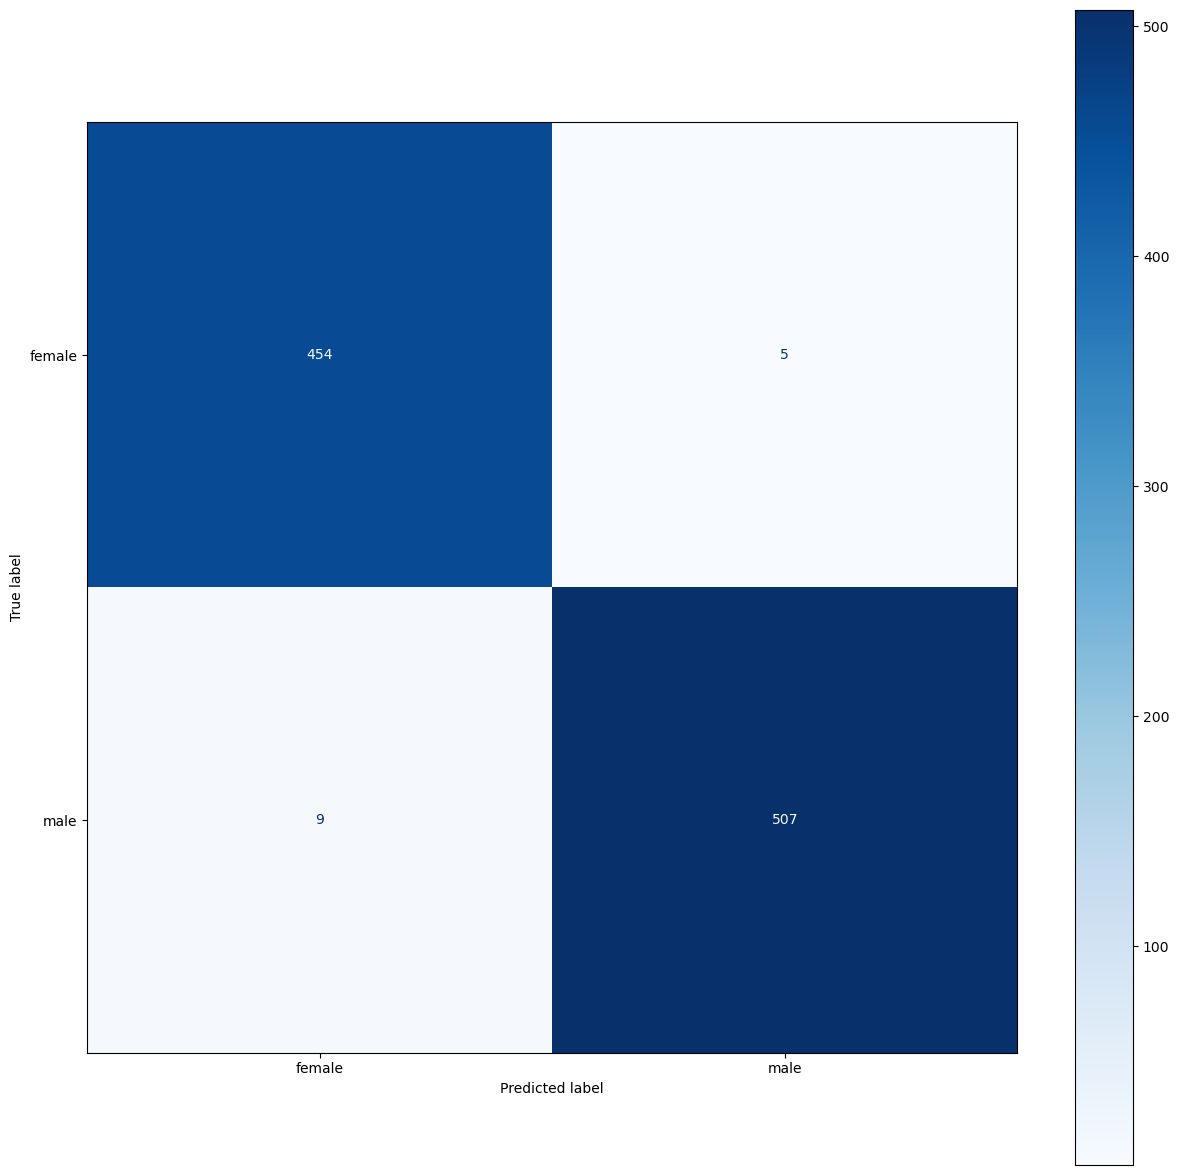

In [5]:
class_names=names
cm = confusion_matrix(y_test, prediction)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
fig, ax = plt.subplots(figsize=(15,15))
disp.plot(ax=ax,cmap=plt.cm.Blues)
plt.show()

In [6]:
indices = np.arange(len(val_data_gen.filenames))
np.random.shuffle(indices)
indices=list(indices)

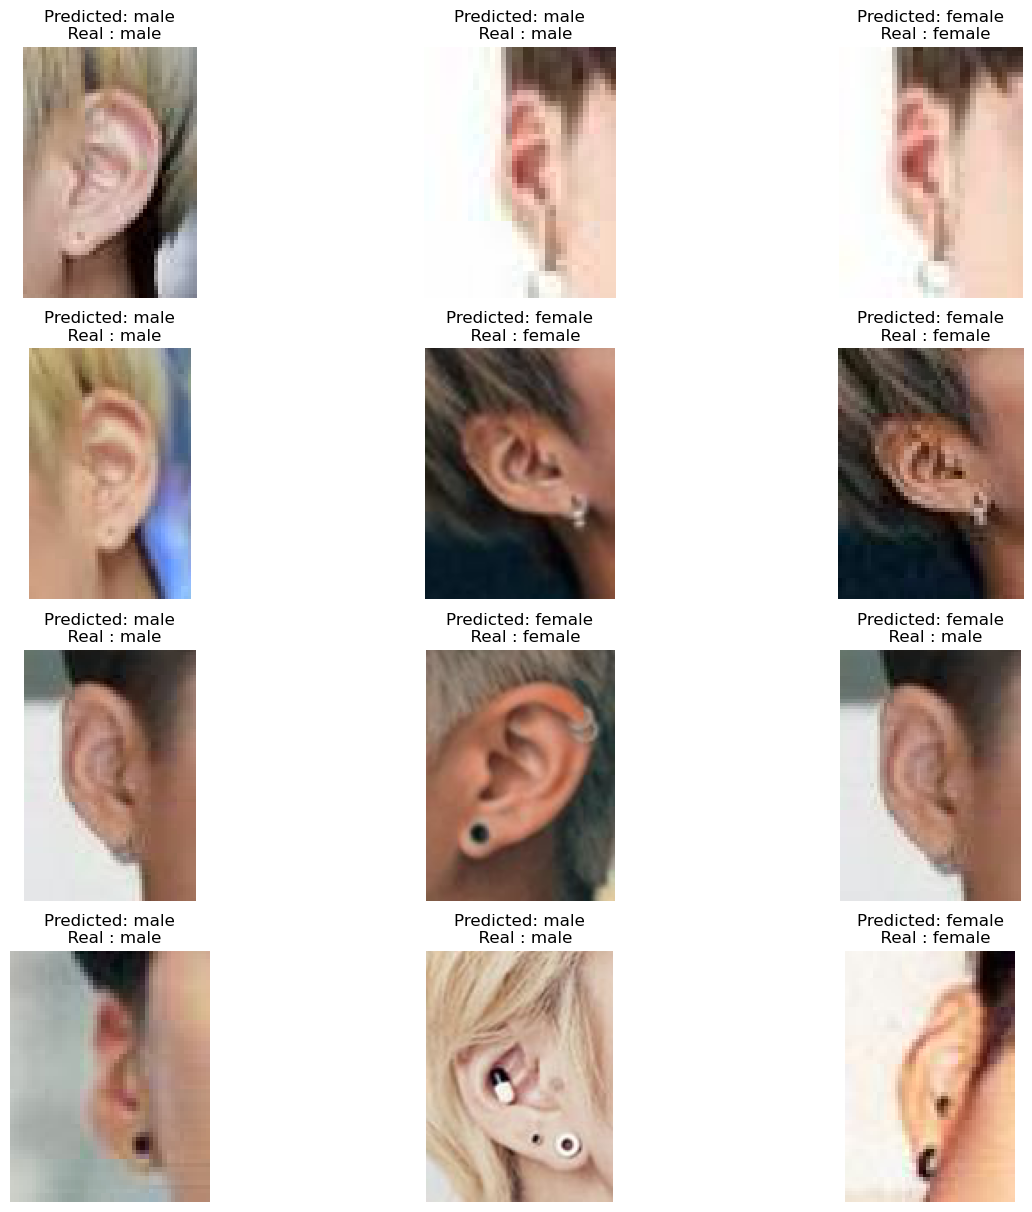

In [7]:
rows = 4

from PIL import Image,ImageOps
classes=class_names
plt.figure(figsize=(15,15))
for k, n in enumerate(val_data_gen.filenames):
    i=indices[k]
    plt.subplot(rows,3,k+1)
    lk=Y_pred[i].tolist()
    if(lk[0]<0.5):
        da=0
    else:
        da=1

    
    plt.title("Predicted: "+classes[da] +"\n  Real : "+classes[y_test[i]])
    plt.axis('off')
    plt.imshow(Image.open("Dataset/test/"+n).convert("RGB"))
    if k==11:
        break